In [33]:
pip install dataframe-image

Note: you may need to restart the kernel to use updated packages.


In [59]:
# Dependencies
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func
from sqlalchemy import extract

# import dataframe_image
import dataframe_image as dfi

In [35]:
engine = create_engine("sqlite:///./Resources/hawaii.sqlite")

# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

# what are the atables in the hawaii.sqlite db
Base.classes.keys()

['measurement', 'station']

In [36]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [37]:
# Create our session (link) from Python to the DB
session = Session(engine)

## D1: Determine the Summary Statistics for June

In [38]:
# 1. Import the sqlalchemy extract function.
# from sqlalchemy import extract

# 2. Write a query that filters the Measurement table to retrieve the temperatures for the month of June. 
june_temps = session.query(Measurement).filter(extract('month', Measurement.date) == 6).all()
#june_temps

In [39]:
#  3. Convert the June temperatures to a list.
june_temps_list = [temp.tobs for temp in june_temps]
june_temps_list[:5]

[78.0, 76.0, 78.0, 76.0, 77.0]

In [40]:
# 4. Create a DataFrame from the list of temperatures for the month of June. 
june_temp_df = pd.DataFrame(june_temps_list, columns=['June Temps'])
june_temp_df

,June Temps
0,78.0
1,76.0
2,78.0
3,76.0
4,77.0
...,...
1695,79.0
1696,74.0
1697,74.0
1698,76.0


In [57]:
june_temp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1700 entries, 0 to 1699
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   June Temps  1700 non-null   float64
dtypes: float64(1)
memory usage: 13.4 KB


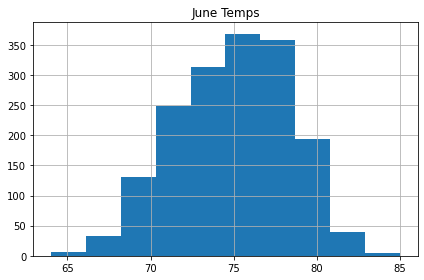

In [68]:
# plot a hitogram
june_temp_df.hist()

# save as an image
plt.tight_layout()
plt.savefig("Images/June_temps_hist.png")

plt.show()

In [42]:
# 5. Calculate and print out the summary statistics for the June temperature DataFrame.
june_temp_summary_stats = june_temp_df.describe()



#export as an image
dfi.export(june_temp_summary_stats, "Images/june_temp_summary_stats.png")



june_temp_summary_stats

,June Temps
count,1700.000000
mean,74.944118
std,3.257417
min,64.000000
25%,73.000000
50%,75.000000
75%,77.000000
max,85.000000


## D2: Determine the Summary Statistics for December

In [53]:
# 6. Write a query that filters the Measurement table to retrieve the temperatures for the month of December.
dec_temps = session.query(Measurement).filter(extract('month', Measurement.date) == 12).all()
# dec_temps

In [85]:
# 7. Convert the December temperatures to a list.
dec_temps_list = [temp.tobs for temp in dec_temps]
dec_temps_list[:5]

[76.0, 74.0, 74.0, 64.0, 64.0]

In [55]:
# 8. Create a DataFrame from the list of temperatures for the month of December. 
dec_temp_df = pd.DataFrame(dec_temps_list, columns=['December Temps'])
dec_temp_df

,December Temps
0,76.0
1,74.0
2,74.0
3,64.0
4,64.0
...,...
1512,71.0
1513,71.0
1514,69.0
1515,65.0


In [66]:
dec_temp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1517 entries, 0 to 1516
Data columns (total 1 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   December Temps  1517 non-null   float64
dtypes: float64(1)
memory usage: 12.0 KB


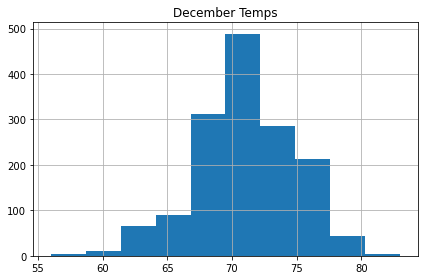

In [69]:
# plot a hitogram
dec_temp_df.hist()

# save as an image
plt.tight_layout()
plt.savefig("Images/dec_temps_hist.png")

plt.show()

In [56]:
# 9. Calculate and print out the summary statistics for the Decemeber temperature DataFrame.
dec_temp_summary_stats = dec_temp_df.describe()



#export as an image
dfi.export(dec_temp_summary_stats, "Images/dec_temp_summary_stats.png")





dec_temp_summary_stats

,December Temps
count,1517.000000
mean,71.041529
std,3.745920
min,56.000000
25%,69.000000
50%,71.000000
75%,74.000000
max,83.000000


## Additional Analysis Precipitation for June

In [71]:
# 1. Import the sqlalchemy extract function.
# from sqlalchemy import extract

# 2. Write a query that filters the Measurement table to retrieve the precipitations for the month of June. 
june_pre = session.query(Measurement).filter(extract('month', Measurement.date) == 6).all()
june_pre

 ...]

In [72]:
june_pre_list = [pre.prcp for pre in june_pre]
june_pre_list[:5]

[0.0, 0.01, 0.0, 0.0, 0.0]

In [73]:
june_pre_df = pd.DataFrame(june_pre_list, columns=['June PRCP'])
june_pre_df

,June PRCP
0,0.00
1,0.01
2,0.00
3,0.00
4,0.00
...,...
1695,0.02
1696,0.10
1697,0.02
1698,0.04


In [74]:
june_temp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1700 entries, 0 to 1699
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   June Temps  1700 non-null   float64
dtypes: float64(1)
memory usage: 13.4 KB


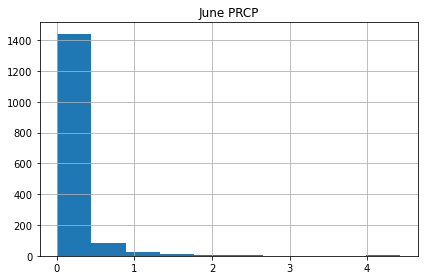

In [75]:
# plot a hitogram
june_pre_df.hist()

# save as an image
plt.tight_layout()
plt.savefig("Images/June_pre_hist.png")

plt.show()

In [77]:
# 5. Calculate and print out the summary statistics for the June temperature DataFrame.
june_pre_summary_stats = june_pre_df.describe()



#export as an image
dfi.export(june_pre_summary_stats, "Images/june_pre_summary_stats.png")



june_pre_summary_stats

,June PRCP
count,1574.000000
mean,0.136360
std,0.335731
min,0.000000
25%,0.000000
50%,0.020000
75%,0.120000
max,4.430000


## Additional Analysis Precipitation for December

In [78]:
# 1. Import the sqlalchemy extract function.
# from sqlalchemy import extract

# 2. Write a query that filters the Measurement table to retrieve the precipitations for the month of June. 
dec_pre = session.query(Measurement).filter(extract('month', Measurement.date) == 12).all()
dec_pre

 ...]

In [79]:
dec_pre_list = [pre.prcp for pre in dec_pre]
dec_pre_list[:5]

[0.04, 0.0, 0.0, 0.0, 0.0]

In [80]:
dec_pre_df = pd.DataFrame(dec_pre_list, columns=['Dec PRCP'])
dec_pre_df

,Dec PRCP
0,0.04
1,0.00
2,0.00
3,0.00
4,0.00
...,...
1512,0.14
1513,0.14
1514,1.03
1515,2.37


In [81]:
dec_temp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1517 entries, 0 to 1516
Data columns (total 1 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   December Temps  1517 non-null   float64
dtypes: float64(1)
memory usage: 12.0 KB


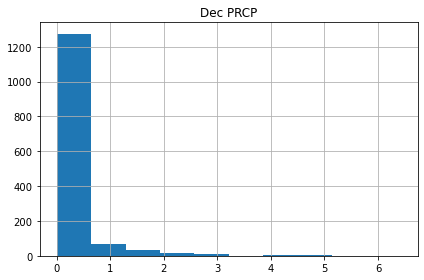

In [82]:
# plot a hitogram
dec_pre_df.hist()

# save as an image
plt.tight_layout()
plt.savefig("Images/Dec_pre_hist.png")

plt.show()

In [83]:
# 5. Calculate and print out the summary statistics for the June temperature DataFrame.
dec_pre_summary_stats = dec_pre_df.describe()



#export as an image
dfi.export(dec_pre_summary_stats, "Images/Dec_pre_summary_stats.png")



dec_pre_summary_stats

,Dec PRCP
count,1405.000000
mean,0.216819
std,0.541399
min,0.000000
25%,0.000000
50%,0.030000
75%,0.150000
max,6.420000
